### Download and visualise Structural Geophysics Atlas 
Follows the [pynoddy tutorial](https://pynoddy.readthedocs.io/en/latest/notebooks/5-Geophysical-Potential-Fields.html) on read and visualise Geophysical Potential Fields.

In [1]:
%matplotlib inline

import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy
import pynoddy.history
import pynoddy.output

import colorcet as cc
import numpy as np

from IPython.core.display import HTML
# css_file = 'pynoddy.css'
# HTML(open(css_file, "r").read())

In [6]:
## Load history and compute block model
url = "http://tectonique.net/asg/ch3/ch3_2/his/ftfellip.his"
output_folder = 'output'

os.makedirs(output_folder, exist_ok=True)
file_name = url.split('/')[-1][:-4]
# output = output_folder + '/' + file_name
history_name = file_name + '.his'
output_name = file_name

his = pynoddy.history.NoddyHistory(url = url)
his.determine_model_stratigraphy()
his.change_cube_size(50) # ~50 < size < 1000. Very slow at 20.
his.write_history(history_name)
# his = pynoddy.history.NoddyHistory(history_name)

pynoddy.compute_model(history_name, output_name)
# for out_file in os.listdir():
#     if file_name in out_file:
#         os.replace(out_file, output_folder + '/' + out_file)
#         print('Renamed ' + out_file +': ' + output_folder + '/' + out_file)     

''

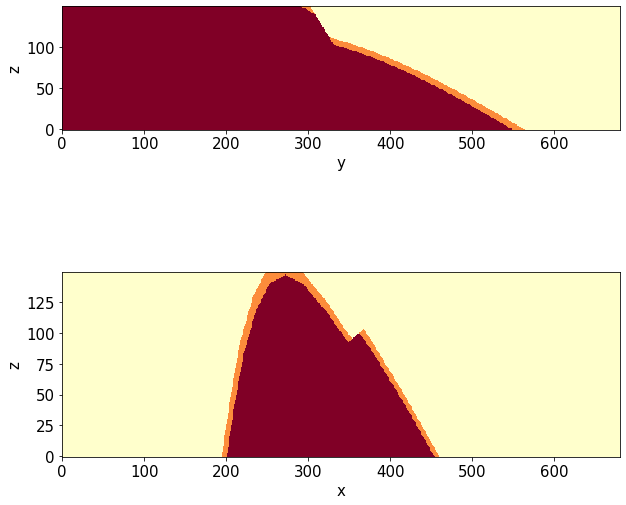

In [7]:
## Visualise profiles of models
h_out = pynoddy.output.NoddyOutput(output_name)
# his.determine_model_stratigraphy()
fig, (x,y) = plt.subplots(2,1, sharex=False, sharey=False, figsize=(10,10))
h_out.plot_section('x',
                   layer_labels = his.model_stratigraphy,
                   colorbar_orientation = 'horizontal',
                   colorbar=False,
                   title = '',
#                  savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
                   cmap = 'YlOrRd',
                   ax = x)

h_out.plot_section('y',
                   layer_labels = his.model_stratigraphy,
                   colorbar_orientation = 'horizontal',
                   title = '',
                   cmap = 'YlOrRd',
#                  savefig=True, fig_filename = 'fold_thrust_EW_section.eps',
                   ve=1.5,
                   ax = y)

# h_out.export_to_vtk(vtk_filename = "fold_thrust")

In [8]:
## Caclulate Geophysics
pynoddy.compute_model(history_name, output_name, sim_type = "GEOPHYSICS")
geophys = pynoddy.output.NoddyGeophysics(output_name)

In [ ]:
## Plot Geophysics
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
# imshow(geophys.grv_data, cmap = 'jet')
# define contour levels
# levels = np.arange(322,344,1)
cf = ax.contourf(geophys.grv_data, cmap = cc.cm.gray) #, vmin = 324, vmax = 342) # levels,
ax.invert_yaxis()
cbar = plt.colorbar(cf, orientation = 'horizontal')
ax = fig.add_subplot(122)
cf = ax.contourf(geophys.mag_data, cmap = cc.cm.gray)
ax.invert_yaxis()

cbar = plt.colorbar(cf, orientation = 'horizontal')

## Perform a synthetic survey and plot

In [51]:
pynoddy survey

SyntaxError: invalid syntax (<ipython-input-51-1c27abf384fd>, line 1)

In [52]:
geo_data_list = list(Path(r'C:\Luke\Python\Processing\pynoddy').glob('**/*.geo'))
names = ['X', 'Y', 'Z', 'MAGNETICS', 'GRAVITY', 'LINE']
df = pd.read_csv(XYZ_data_list[0], names=names, delim_whitespace=True, header=0)

plt.scatter(df.X, df.Y, df.GRAVITY)
plt.gca().invert_yaxis()

NameError: name 'Path' is not defined